In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Determine the «survival» rates independently for men and women for age groups; 

0-4,	5-9,	10-14,	15-19, 	20-24, 	25-29,	30-34,	35-39,	40-44,	45-49,	50-54,	55-59,	60-64,	65-69,	70-74,	75-79,	80-84,	85-89,	90-94,	95-99, and	100+ according to 2000-2005 population data from the UN (NIGERIA)

Survival Rate (SR) = Population at the end of the age groupb (PEG) / Population at the beginning of the age group (PBG)

i.e SR = PEG/PBG

Input data: Population estimates for each age group for female, and male from 2000 to 2005
Output data: Survival rates for each age group for females and males
Parameters: None, as we only using the given demographic data to compute survival rates

In [6]:
# Source: https://population.un.org/wpp/Download/Standard/Population/

# Input data for the Nigerian female and male population estimates
female_data = [
    [2000, 10552, 8483, 7258, 6547, 5626, 4528, 3667, 3098, 2602, 2178, 1802, 1528, 1201, 882, 590, 341, 156, 51, 11, 1, 0],
    [2001, 10869, 8728, 7406, 6660, 5799, 4709, 3778, 3175, 2667, 2232, 1834, 1566, 1230, 904, 604, 349, 160, 52, 11, 1, 0],
    [2002, 11218, 8975, 7577, 6761, 5961, 4894, 3904, 3252, 2734, 2288, 1871, 1601, 1259, 927, 618, 357, 163, 53, 11, 1, 0],
    [2003, 11592, 9220, 7772, 6855, 6110, 5085, 4041, 3332, 2804, 2345, 1917, 1627, 1289, 952, 633, 365, 167, 55, 11, 1, 0],
    [2004, 11968, 9479, 7982, 6960, 6245, 5273, 4194, 3417, 2875, 2403, 1980, 1639, 1321, 976, 649, 373, 171, 56, 12, 1, 0],
    [2005, 12332, 9765, 8206, 7084, 6364, 5447, 4359, 3510, 2946, 2462, 2041, 1655, 1354, 1001, 665, 382, 175, 58, 12, 1, 0],
]

male_data = [
    [2000, 10871, 8705, 7423, 6682, 5730, 4588, 3703, 3116, 2593, 2137, 1778, 1492, 1141, 814, 526, 289, 122, 34, 6, 0, 0],
    [2001, 11197, 8960, 7585, 6797, 5904, 4773, 3818, 3197, 2661, 2195, 1796, 1530, 1170, 835, 539, 296, 125, 36, 6, 0, 0],
    [2002, 11555, 9216, 7771, 6902, 6069, 4962, 3948, 3279, 2733, 2253, 1821, 1565, 1199, 858, 553, 304, 129, 37, 7, 0, 0],
    [2003, 11937, 9480, 7981, 7011, 6218, 5154, 4089, 3364, 2807, 2313, 1851, 1592, 1230, 880, 568, 311, 133, 38, 7, 0, 0],
    [2004, 12322, 9750, 8215, 7125, 6356, 5336, 4246, 3456, 2883, 2375, 1900, 1599, 1262, 903, 583, 319, 137, 39, 7, 0, 0],
    [2005, 12702, 10036, 8463, 7250, 6487, 5509, 4417, 3551, 2961, 2438, 1950, 1607, 1294, 927, 598, 327, 141, 40, 8, 0, 0],
]

Panda DataFrames to hold this information

In [3]:
female_df = pd.DataFrame(female_data, columns=["Year"] + [f"{i}-{i+4}" for i in range(0, 100, 5)] + ["100+"])
male_df = pd.DataFrame(male_data, columns=["Year"] + [f"{i}-{i+4}" for i in range(0, 100, 5)] + ["100+"])

In [7]:
female_df

,Year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,2000,10552,8483,7258,6547,5626,4528,3667,3098,2602,...,1528,1201,882,590,341,156,51,11,1,0
1,2001,10869,8728,7406,6660,5799,4709,3778,3175,2667,...,1566,1230,904,604,349,160,52,11,1,0
2,2002,11218,8975,7577,6761,5961,4894,3904,3252,2734,...,1601,1259,927,618,357,163,53,11,1,0
3,2003,11592,9220,7772,6855,6110,5085,4041,3332,2804,...,1627,1289,952,633,365,167,55,11,1,0
4,2004,11968,9479,7982,6960,6245,5273,4194,3417,2875,...,1639,1321,976,649,373,171,56,12,1,0
5,2005,12332,9765,8206,7084,6364,5447,4359,3510,2946,...,1655,1354,1001,665,382,175,58,12,1,0


In [8]:
male_df

,Year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,2000,10871,8705,7423,6682,5730,4588,3703,3116,2593,...,1492,1141,814,526,289,122,34,6,0,0
1,2001,11197,8960,7585,6797,5904,4773,3818,3197,2661,...,1530,1170,835,539,296,125,36,6,0,0
2,2002,11555,9216,7771,6902,6069,4962,3948,3279,2733,...,1565,1199,858,553,304,129,37,7,0,0
3,2003,11937,9480,7981,7011,6218,5154,4089,3364,2807,...,1592,1230,880,568,311,133,38,7,0,0
4,2004,12322,9750,8215,7125,6356,5336,4246,3456,2883,...,1599,1262,903,583,319,137,39,7,0,0
5,2005,12702,10036,8463,7250,6487,5509,4417,3551,2961,...,1607,1294,927,598,327,141,40,8,0,0


Survival Rate (SR) = Population at the end of the age groupb (PEG) / Population at the beginning of the age group (PBG) i.e. SR = PEG/PBG

In [11]:
def calculate_survival_rate_2000_to_2005(df):
    sr_2000_to_2005 = pd.DataFrame(columns=[f"SR_{i}-{i+4}" for i in range(5, 100, 5)], index=[0])

    for i in range(2, df.shape[1] - 1):
        with np.errstate(divide='ignore', invalid='ignore'):
            rate = np.divide(df.iloc[-1, i], df.iloc[0, i - 1])
            if np.isnan(rate):
                rate = 0
        sr_2000_to_2005.iloc[0, i - 2] = rate

    return sr_2000_to_2005


In [14]:
female_survival_rates_2000_to_2005 = calculate_survival_rate_2000_to_2005(female_df)
male_survival_rates_2000_to_2005 = calculate_survival_rate_2000_to_2005(male_df)

In [15]:
female_survival_rates_2000_to_2005

,SR_5-9,SR_10-14,SR_15-19,SR_20-24,SR_25-29,SR_30-34,SR_35-39,SR_40-44,SR_45-49,SR_50-54,SR_55-59,SR_60-64,SR_65-69,SR_70-74,SR_75-79,SR_80-84,SR_85-89,SR_90-94,SR_95-99
0,0.925417,0.967346,0.976026,0.972048,0.968183,0.962677,0.957186,0.950936,0.946195,0.937098,0.918424,0.886126,0.833472,0.753968,0.647458,0.513196,0.371795,0.235294,0.090909


In [16]:
male_survival_rates_2000_to_2005

,SR_5-9,SR_10-14,SR_15-19,SR_20-24,SR_25-29,SR_30-34,SR_35-39,SR_40-44,SR_45-49,SR_50-54,SR_55-59,SR_60-64,SR_65-69,SR_70-74,SR_75-79,SR_80-84,SR_85-89,SR_90-94,SR_95-99
0,0.92319,0.9722,0.976694,0.970817,0.961431,0.962729,0.958952,0.950257,0.940224,0.912494,0.903825,0.867292,0.812445,0.734644,0.621673,0.487889,0.327869,0.235294,0.0


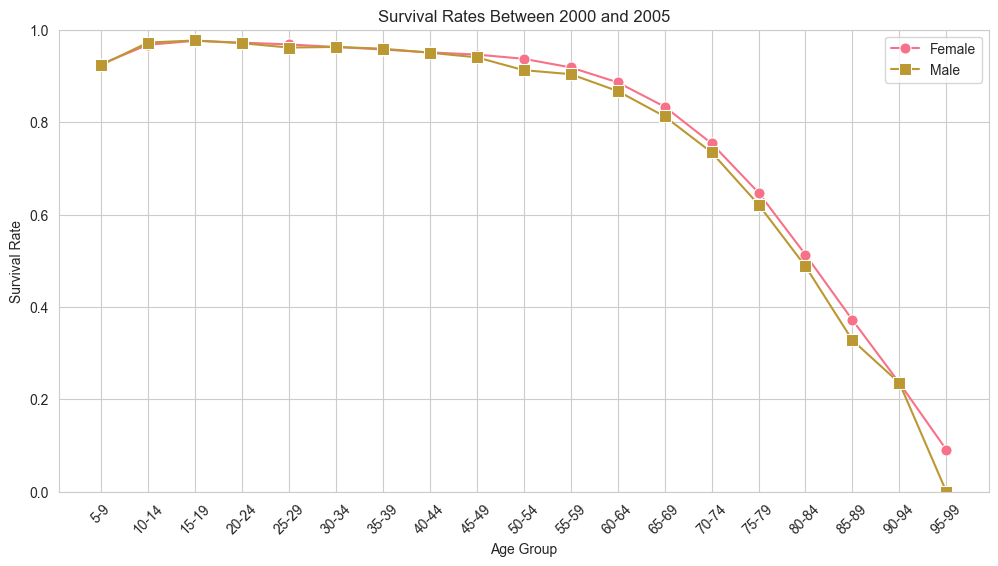

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Set up the plot
plt.figure(figsize=(12, 6))
plt.title("Survival Rates Between 2000 and 2005")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")

# Plot the data
age_groups = [f"{i}-{i+4}" for i in range(5, 100, 5)]
sns.lineplot(x=age_groups, y=female_survival_rates_2000_to_2005.iloc[0], label="Female", linestyle='-', marker='o', markersize=8)
sns.lineplot(x=age_groups, y=male_survival_rates_2000_to_2005.iloc[0], label="Male", linestyle='-', marker='s', markersize=8)

# Customize the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Show the plot
plt.show()


2. Determine the fertility rate for women in the age category 20-24, 25-29,	30-34, and	35-39

The Age-Specific Fertility Rate (ASFR) is expressed as the number of live births per 1,000 women in a specific age group during a specific year

Age-Specific Fertility rate (ASFR) = (number of live births in an age group) / (number of women in the same age group) * 1000

Input: number of live births and female population data
Output: fertility rate for each age group (20-24, 25-29, 30-34, and 35-39)

First, let's create a DataFrame with the number of live births for each age group and year:

In [18]:
# Data Source
# https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/3_Fertility/WPP2022_FERT_F04_BIRTHS_BY_5-YEAR_AGE_GROUPS_OF_MOTHER.xlsx

births_data = [
    [2000, 1349, 1221, 909, 586],
    [2001, 1361, 1274, 950, 600],
    [2002, 1390, 1313, 972, 608],
    [2003, 1394, 1351, 1013, 611],
    [2004, 1433, 1401, 1047, 622],
    [2005, 1466, 1445, 1082, 637],
]

births_df = pd.DataFrame(births_data, columns=["Year", "20-24", "25-29", "30-34", "35-39"])


In [19]:
births_df

,Year,20-24,25-29,30-34,35-39
0,2000,1349,1221,909,586
1,2001,1361,1274,950,600
2,2002,1390,1313,972,608
3,2003,1394,1351,1013,611
4,2004,1433,1401,1047,622
5,2005,1466,1445,1082,637


Next, let's extract the number of women in each age group for each year from the female population data:

In [23]:
female_age_groups_df = female_df[["Year", "20-24", "25-29", "30-34", "35-39"]]

In [24]:
female_age_groups_df

,Year,20-24,25-29,30-34,35-39
0,2000,5626,4528,3667,3098
1,2001,5799,4709,3778,3175
2,2002,5961,4894,3904,3252
3,2003,6110,5085,4041,3332
4,2004,6245,5273,4194,3417
5,2005,6364,5447,4359,3510


Now, let's calculate the ASFR for each age group and year:

In [30]:
def calculate_asfr(births_df, female_age_groups_df):
    asfr_data = []

    for index, row in births_df.iterrows():
        year = row["Year"]
        asfr_row = [year]

        for age_group in ["20-24", "25-29", "30-34", "35-39"]:
            births = row[age_group]
            female_population = female_age_groups_df.loc[female_age_groups_df["Year"] == year, age_group].iloc[0]
            asfr = round((births / female_population) * 1000, 2)
            asfr_row.append(asfr)

        asfr_data.append(asfr_row)

    asfr_df = pd.DataFrame(asfr_data, columns=["Year", "20-24", "25-29", "30-34", "35-39"])
    return asfr_df


In [31]:
asfr_df = calculate_asfr(births_df, female_age_groups_df)


In [32]:
asfr_df

,Year,20-24,25-29,30-34,35-39
0,2000,239.78,269.66,247.89,189.15
1,2001,234.70,270.55,251.46,188.98
2,2002,233.18,268.29,248.98,186.96
3,2003,228.15,265.68,250.68,183.37
4,2004,229.46,265.69,249.64,182.03
5,2005,230.36,265.28,248.22,181.48


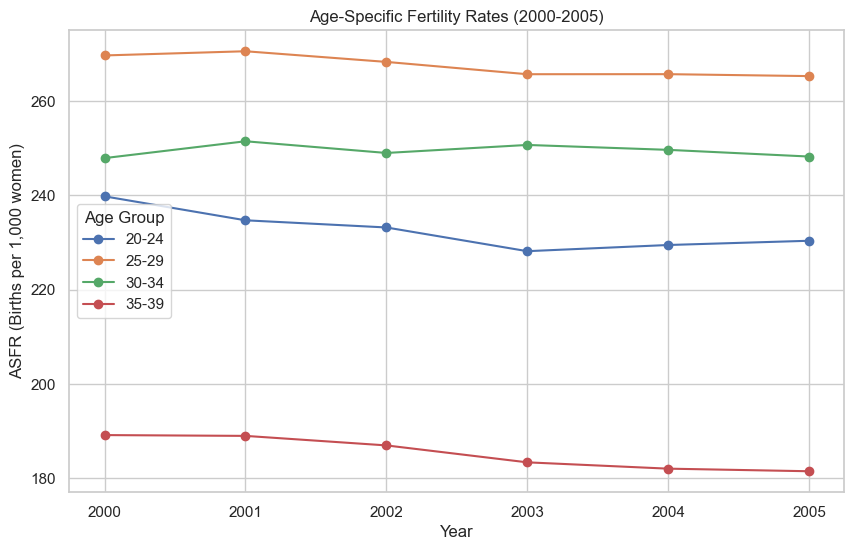

In [36]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the ASFR data for each age group
for col in asfr_df.columns[1:]:
    plt.plot(asfr_df['Year'], asfr_df[col], marker='o', label=col)

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('ASFR (Births per 1,000 women)')
plt.title('Age-Specific Fertility Rates (2000-2005)')

# Customize the legend
plt.legend(title="Age Group")

# Display the plot
plt.show()


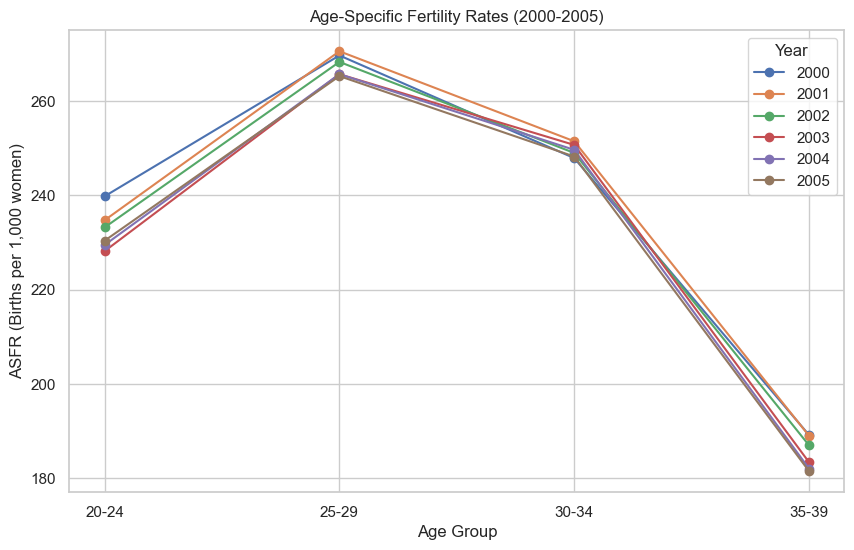

In [38]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the ASFR data for each year
for i, year in enumerate(asfr_df['Year']):
    plt.plot(asfr_df.columns[1:], asfr_df.iloc[i, 1:], marker='o', label=str(year))

# Set axis labels and title
plt.xlabel('Age Group')
plt.ylabel('ASFR (Births per 1,000 women)')
plt.title('Age-Specific Fertility Rates (2000-2005)')

# Customize the legend
plt.legend(title="Year")

# Display the plot
plt.show()


2. In our next task, we Calculate boys/girls ratio for newborn children.

boys/girls ratio = (number of newborn boys) / (number of newborn girls)

Input data: number of newborn boys and girls in each year
Output data: boys/girls ratio for each year

We will use the previously defined female_data and male_data for the number of newborns in each year. 
The number of newborns can be found in the "0-4" age group. 

In [42]:
def calculate_boys_girls_ratio(male_data, female_data):
    # Extract the number of newborn boys and girls for each year
    newborn_boys = [row[1] for row in male_data]
    newborn_girls = [row[1] for row in female_data]

    # Calculate the boys/girls ratio for each year
    boys_girls_ratio = [boys/girls for boys, girls in zip(newborn_boys, newborn_girls)]

    # Create a DataFrame with the results
    boys_girls_ratio_df = pd.DataFrame({
        'Year': [row[0] for row in female_data],
        'Boys/Girls Ratio': boys_girls_ratio
    })

    return boys_girls_ratio_df


In [43]:
boys_girls_ratio_df = calculate_boys_girls_ratio(male_data, female_data)
boys_girls_ratio_df

,Year,Boys/Girls Ratio
0,2000,1.030231
1,2001,1.030178
2,2002,1.030041
3,2003,1.029762
4,2004,1.029579
5,2005,1.030003


In [49]:
def plot_boys_girls_ratio(df):
    # Set the style and color palette for the plot
    sns.set(style="whitegrid")

    # Create a bar plot of the boys/girls ratio data
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x="Year", y="Boys/Girls Ratio", data=df,
                     palette=["g" if ratio >= 1 else "r" for ratio in df["Boys/Girls Ratio"]])

    # Set the title, x-axis label, and y-axis label for the plot
    ax.set_title("Boys/Girls Ratio for Newborns (2000-2005)", fontsize=16)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Boys/Girls Ratio", fontsize=14)

    # Customize the appearance of the plot
    sns.despine(left=True, bottom=True)
    ax.yaxis.grid(True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Set the y-axis limits to zoom in on the small differences
    ax.set_ylim(1.02, 1.04)

    # Add data labels above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Show the plot
    plt.show()

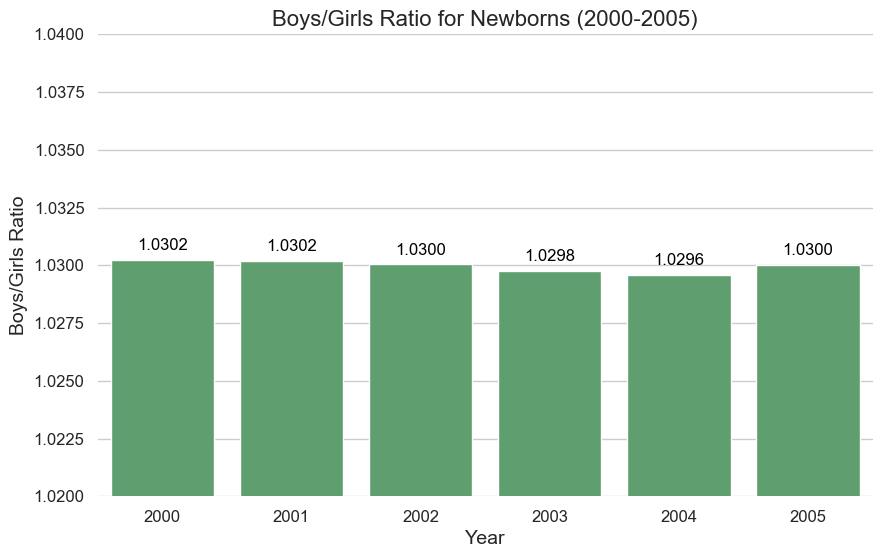

In [50]:
plot_boys_girls_ratio(boys_girls_ratio_df)

4. Predict the change in the country's population and demographic profile for 100 years and compare with existing predictions!

Inputs:

Age-specific fertility rates (ASFR)
Age-specific survival rates
Initial population distribution across age groups (for both males and females)

Output:

Predicted population distribution across age groups for 100 years into the future

Parameters:

Number of years to predict (100 years)